In [ ]:
# KNN Classification - Supervised Machine Learning Algorithm used for both classification and regression
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
filename = '/content/pima-indians-diabetes.data.csv'
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]

In [ ]:
dataframe

In [ ]:
X

In [ ]:
#Apply minmax scaling
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [ ]:
X

In [ ]:
num_folds = 10
kfold = KFold(n_splits=10)

In [ ]:
model = KNeighborsClassifier(n_neighbors=17)#k=17
results = cross_val_score(model, X, Y, cv=kfold)

In [ ]:
results

array([0.67532468, 0.83116883, 0.67532468, 0.67532468, 0.77922078,
       0.77922078, 0.80519481, 0.84415584, 0.72368421, 0.77631579])

In [ ]:
print(results.mean())

0.7564935064935066


### Grid Search for Algorithm Tuning

In [ ]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
filename = '/content/pima-indians-diabetes.data.csv'
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]

In [ ]:
#n_neighbors = np.array(range(1,40)) # k=1 to 39 all numbers even and odd will be considered
n_neighbors = np.array([2*i+1 for i in range(0,20)]) #only odd number of clusters (1 3 5 7 ... 39) will be considered
param_grid = dict(n_neighbors=n_neighbors) # used to create a python dictionary called param_grid

In [ ]:
param_grid

In [ ]:
n_neighbors

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

### Visualizing the CV results

In [ ]:
# search for an optimal value of K for KNN
# range of k we want to try
k_range = range(1, 41)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

# k_scores=grid.best_score_
pd.Series(k_scores).sort_values(ascending=False)

16    0.755297
17    0.755280
13    0.753913
15    0.752614
21    0.750120
20    0.750068
22    0.747522
18    0.747471
11    0.747368
24    0.746206
19    0.746189
14    0.744805
23    0.743592
9     0.743472
37    0.742259
34    0.742242
12    0.742208
6     0.739627
39    0.738397
38    0.738380
8     0.738346
7     0.738312
26    0.737081
32    0.737064
35    0.737030
10    0.736945
33    0.735748
36    0.735731
5     0.735714
30    0.734450
25    0.733168
28    0.731852
31    0.731852
27    0.730537
29    0.725359
4     0.721377
3     0.718712
1     0.712235
2     0.703059
0     0.679665
dtype: float64

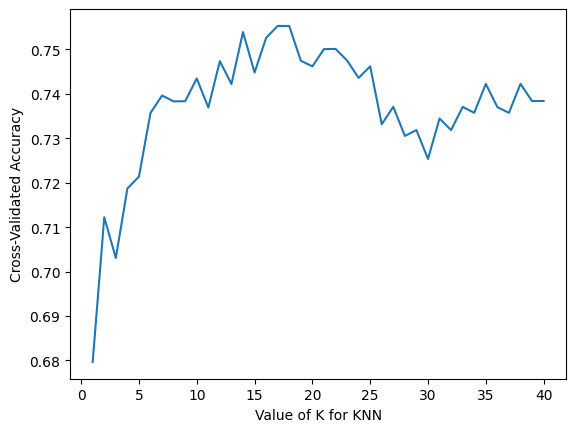

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()